In [1]:
from numpy import random
import math
import matplotlib.pyplot as plt

In [2]:
def Newtons_derivatives(unknown_function, x, h=1e-7):
    
    y_xph = unknown_function(x + h)
    y_xmh = unknown_function(x - h)
    y_x   = unknown_function(x)
    dydx = (y_xph - y_xmh) / (2.0 * h)
    d2ydx2 = (y_xph - 2.0*y_x + y_xmh) / (h * h)
    
    return dydx, d2ydx2

In [3]:
def Newtons_step(unknown_function, x, h=1e-7):
    
    dydx, d2ydx2 = Newtons_derivatives(unknown_function, x, h=h)
    y = unknown_function(x)

    if abs(d2ydx2) > 1e-17:
        x = x - (dydx / d2ydx2)
    else:
        x = -x

    return x

In [4]:
def HOUND_derivatives(k, f, z0, z1, z2): #, g = 1000
    #accelerated triple cumulative smoothing
    e = f - (z0 + z1 + (z2 / 2))
    #z0 = z0 + (e * (9 + 3*g) / (k + 3*g)) + z1 + (z2 / 2)
    #z1 = z1 + (e * (36 + 21*g + 3*(g**2)) / (k + 3*g)**2) + z2
    #z2 = z2 + (e * (60 + 47*g + 12*(g**2) + g**3) / (k + 3*g)**3)
    z0 = z0 + (e * 3009 / (k + 3000)) + z1 + (z2 / 2)
    z1 = z1 + (e * 3021036 / (k + 3000)**2) + z2
    z2 = z2 + (e * 1012047060 / (k + 3000)**3)

    return z0, z1, z2

In [5]:
def HOUND_step(k, x, y, x_z0, x_z1, x_z2, x2_z0, x2_z1, x2_z2, y_z0, y_z1, y_z2): #, g = 1000

    x_z0, x_z1, x_z2 = HOUND_derivatives(k, x, x_z0, x_z1, x_z2) #, g=g
    x2_z0, x2_z1, x2_z2 = HOUND_derivatives(k, x**2, x2_z0, x2_z1, x2_z2) #, g=g
    y_z0, y_z1, y_z2 = HOUND_derivatives(k, y, y_z0, y_z1, y_z2) #, g=g

    if abs(y_z2*x_z1 - y_z1*x_z2) > 1e-17:
        x = ((y_z2*x2_z1 - y_z1*x2_z2)/(y_z2*x_z1 - y_z1*x_z2))/2
        #x = x - ((y_z1*(x_z1**2))/(y_z2*x_z1 - y_z1*x_z2)) # that formula doesn't work
    else:
        x = -x

    return x, x_z0, x_z1, x_z2, x2_z0, x2_z1, x2_z2, y_z0, y_z1, y_z2

In [6]:
def NewtonsHOUND_iteration(unknown_function, xmin, x0, max_iterations = 200, debug=False, h=1e-2, label=''): #, g = 1000
    x_Newton = x0
    y_Newton = unknown_function(x_Newton)

    x_HOUND = x0
    y_HOUND = unknown_function(x_HOUND)
    x_z0 = x_HOUND
    x_z1 = 0
    x_z2 = 0
    x2_z0 = x_HOUND**2
    x2_z1 = 0
    x2_z2 = 0
    y_z0 = y_HOUND
    y_z1 = 0
    y_z2 = 0

    iteration = 0

    if debug: print(f"Newton's Iteration {iteration}: x = {x_Newton:.8f}, y(x) = {y_Newton:.8f}\tHOUND Iteration {iteration}: x = {x_HOUND:.8f}, y(x) = {y_HOUND:.8f}")

    iterations = [0]
    errors_Newton = [abs(x_Newton - xmin)]
    errors_HOUND = [abs(x_HOUND - xmin)]

    while iteration < max_iterations:
        iteration += 1

        x_Newton = Newtons_step(unknown_function, x_Newton, h=h)
        x_HOUND, x_z0, x_z1, x_z2, x2_z0, x2_z1, x2_z2, y_z0, y_z1, y_z2 = HOUND_step(iteration, x_HOUND, y_HOUND, x_z0, x_z1, x_z2, x2_z0, x2_z1, x2_z2, y_z0, y_z1, y_z2) #, g=g

        iterations.append(iteration)
        errors_Newton.append(abs(x_Newton - xmin))
        errors_HOUND.append(abs(x_HOUND - xmin))
        
        y_Newton = unknown_function(x_Newton)
        y_HOUND = unknown_function(x_HOUND)

        if debug: print(f"Newton's Iteration {iteration}: x = {x_Newton:.8f}, y(x) = {y_Newton:.8f}\tHOUND Iteration {iteration}: x = {x_HOUND:.8f}, y(x) = {y_HOUND:.8f}")

    fig, ax = plt.subplots()
    plt.title(label)
    #ax.set_ylim(1e-3, 1e2)
    ax.plot(iterations, errors_Newton, label='Newton\'s')
    ax.plot(iterations, errors_HOUND, label='HOUND')
    ax.set_xlabel("k")
    ax.set_ylabel("absolute value of error")
    ax.set_yscale('log')
    ax.grid();
    plt.legend()
    plt.show();

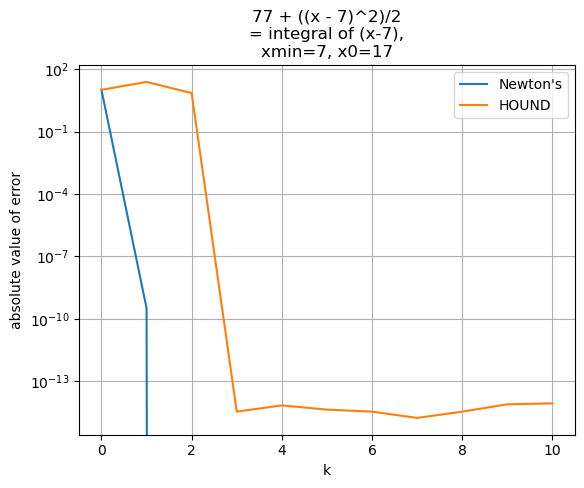

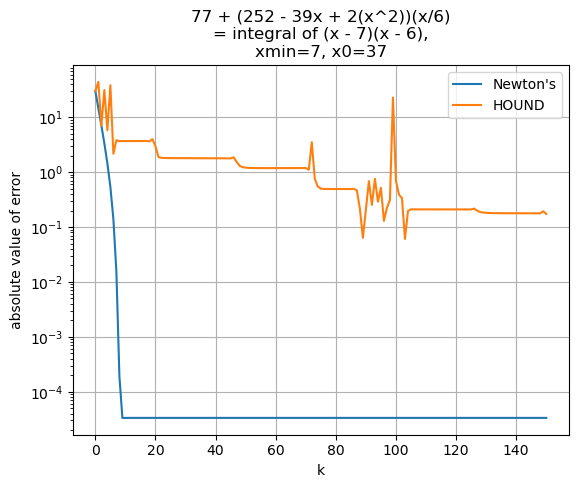

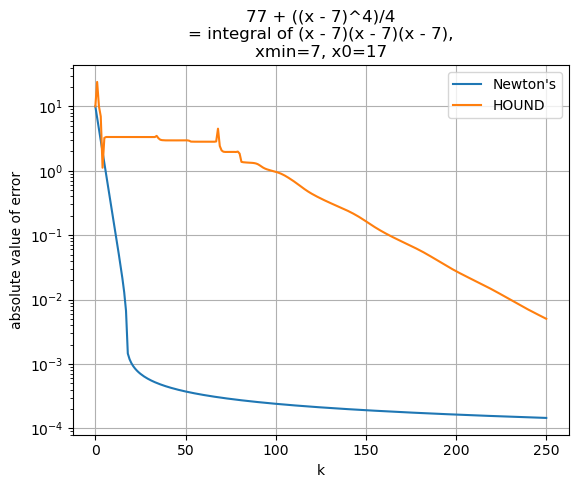

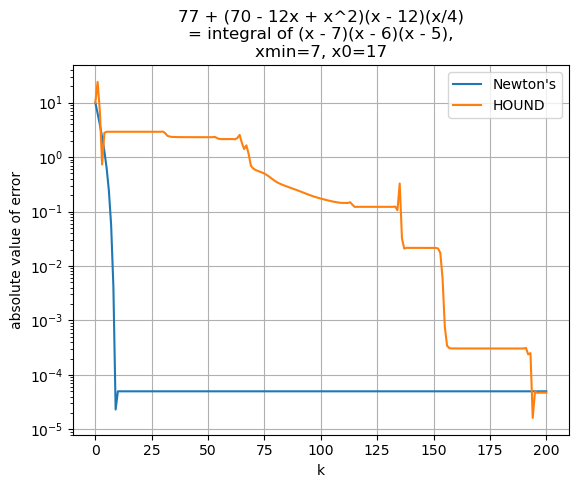

In [7]:
NewtonsHOUND_iteration(lambda x: 77 + ((x - 7)**2)/2, label='77 + ((x - 7)^2)/2\n= integral of (x-7),\nxmin=7, x0=17', xmin=7.0, x0=17.0, max_iterations = 10)
NewtonsHOUND_iteration(lambda x: 77 + (252 - 39*x + 2*(x**2))*(x/6), label='77 + (252 - 39x + 2(x^2))(x/6)\n= integral of (x - 7)(x - 6),\nxmin=7, x0=37', xmin=7.0, x0=37.0, max_iterations = 150)
NewtonsHOUND_iteration(lambda x: 77 + ((x - 7)**4)/4, label='77 + ((x - 7)^4)/4\n= integral of (x - 7)(x - 7)(x - 7),\nxmin=7, x0=17', xmin=7.0, x0=17.0, max_iterations = 250)
NewtonsHOUND_iteration(lambda x: 77 + (70 - 12*x + x**2)*(x - 12)*(x/4), label='77 + (70 - 12x + x^2)(x - 12)(x/4)\n= integral of (x - 7)(x - 6)(x - 5),\nxmin=7, x0=17', xmin=7.0, x0=17.0)

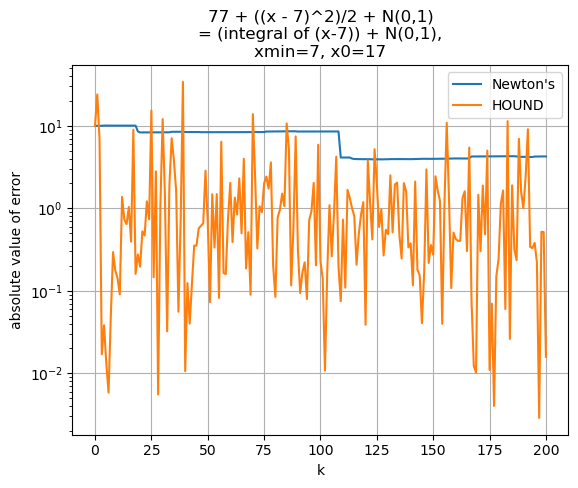

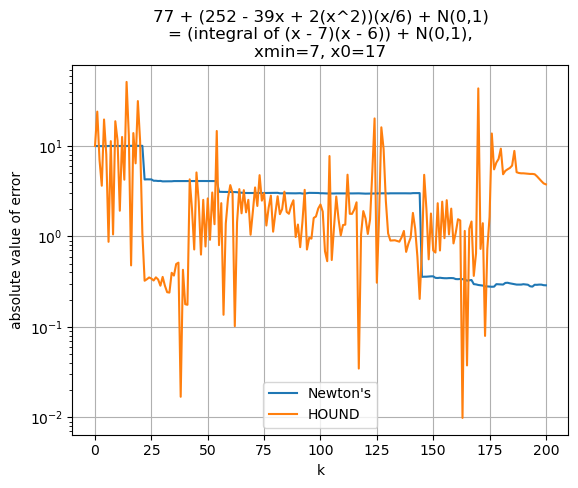

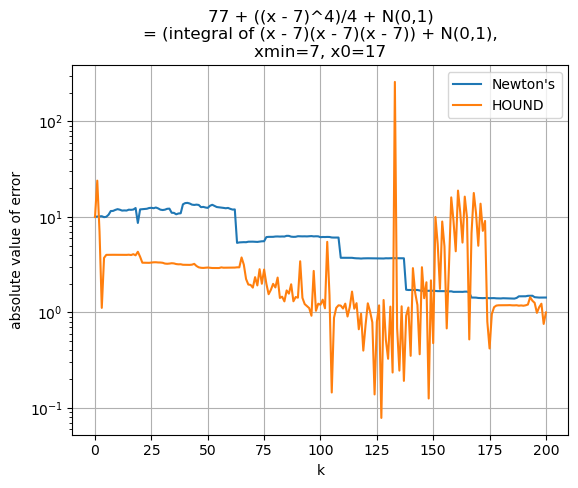

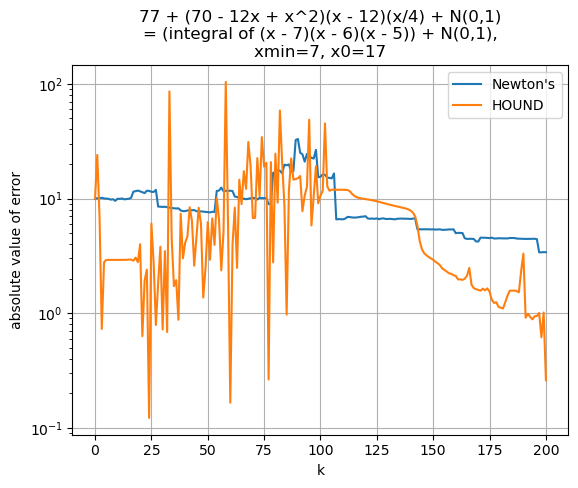

In [8]:
random.seed(77777); NewtonsHOUND_iteration(lambda x: 77 + ((x - 7)**2)/2 + random.normal(0, 1), label='77 + ((x - 7)^2)/2 + N(0,1)\n= (integral of (x-7)) + N(0,1),\nxmin=7, x0=17', xmin=7.0, x0=17.0)
random.seed(17577); NewtonsHOUND_iteration(lambda x: 77 + (252 - 39*x + 2*(x**2))*(x/6) + random.normal(0, 1), label='77 + (252 - 39x + 2(x^2))(x/6) + N(0,1)\n= (integral of (x - 7)(x - 6)) + N(0,1),\nxmin=7, x0=17', xmin=7.0, x0=17.0)
random.seed(77777); NewtonsHOUND_iteration(lambda x: 77 + ((x - 7)**4)/4 + random.normal(0, 1), label='77 + ((x - 7)^4)/4 + N(0,1)\n= (integral of (x - 7)(x - 7)(x - 7)) + N(0,1),\nxmin=7, x0=17', xmin=7.0, x0=17.0)
random.seed(77377); NewtonsHOUND_iteration(lambda x: 77 + (70 - 12*x + x**2)*(x - 12)*(x/4) + random.normal(0, 1), label='77 + (70 - 12x + x^2)(x - 12)(x/4) + N(0,1)\n= (integral of (x - 7)(x - 6)(x - 5)) + N(0,1),\nxmin=7, x0=17', xmin=7.0, x0=17.0)